# PyLoan, a basic loan simulation notebook

In [18]:
from datetime import datetime, timedelta

%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from dateutil import relativedelta
from IPython.display import display
from ipywidgets import Button, HBox, VBox


def mortgage_payments(r, P, n):
    return r * P / (1 - (1 + r) ** -n)


def monthly_payment(rate, amount, years):
    return mortgage_payments(r=rate, P=amount, n=years) / 12


def timeline(start_date, rate, amount, years):
    per_month = monthly_payment(rate, amount, years)
    losses = [0.0]
    times = [start_date - relativedelta.relativedelta(months=1)]
    reminders = [amount]
    for year in range(int(years)):
        yearly_loss = reminders[-1] * rate
        monthly_loss = yearly_loss / 12
        for month in range(12):
            date = start_date + relativedelta.relativedelta(months=month, years=year)
            times.append(date)
            losses.append(losses[-1] + monthly_loss)
            reminders.append(reminders[-1] - (per_month - monthly_loss))
    return per_month, times, losses, reminders

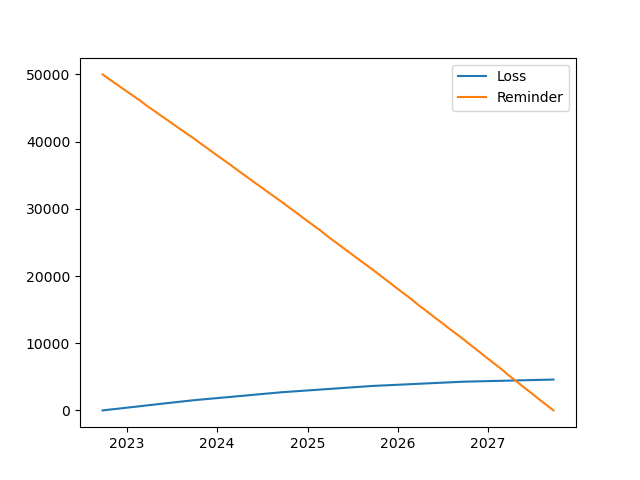

In [20]:
loan_duration_years_w = widgets.IntSlider(min=5, max=25)
loan_sum_w = widgets.BoundedIntText(min=50, max=300)
loan_rate_w = widgets.BoundedFloatText(min=0.01, max=100.0, value=3.0)
loan_start_date_w = widgets.DatePicker(disabled=False, value=datetime.now())

loan_total_cost_w = widgets.Label()
loan_per_month_payment_w = widgets.Label()

display(
    VBox(
        [
            HBox(
                [
                    widgets.Label("Pick a start Date:"),
                    loan_start_date_w,
                    widgets.Label("Duration (years):"),
                    loan_duration_years_w,
                    widgets.Label("Amount (k€):"),
                    loan_sum_w,
                    widgets.Label("Rate (%):"),
                    loan_rate_w,
                ]
            ),
            loan_total_cost_w,
            loan_per_month_payment_w
        ]
    )
)

losses_line = None
reminders_line = None


def update_plot(*args, **kwargs):
    global losses_line
    global reminders_line
    start_date = loan_start_date_w.value
    rate = loan_rate_w.value / 100
    loan_sum = loan_sum_w.value * 1000
    duration_years = loan_duration_years_w.value
    per_month, times, losses, reminders = timeline(
        start_date, rate, loan_sum, duration_years
    )
    loan_total_cost_w.value = f"Loan total cost: {losses[-1]/1000:.2f}k€"
    loan_per_month_payment_w.value = f"Monthly payments: {per_month:.1f}€"
    if losses_line is None:
        plt.figure()
        (losses_line,) = plt.plot(times, losses, label="Loss")
        (reminders_line,) = plt.plot(times, reminders, label="Reminder")
        plt.legend()
        plt.show()
    else:
        losses_line.set_ydata(losses)
        losses_line.set_xdata(times)
        reminders_line.set_ydata(reminders)
        reminders_line.set_xdata(times)
        plt.ylim(0.0, loan_sum)
        plt.xlim(
            start_date, start_date + relativedelta.relativedelta(years=duration_years)
        )
        plt.draw()


update_plot()

loan_start_date_w.observe(update_plot, names="value")
loan_duration_years_w.observe(update_plot, names="value")
loan_sum_w.observe(update_plot, names="value")
loan_rate_w.observe(update_plot, names="value")